# EDA Project

In this project we are going to be looking at user shopping habits from the grocery application, Instacart. We will first need to look through all of the datasets to ensure the data is clean, then we will analyse and report on the various trends and tendencies of Instacart customers through various graphs.

Loading all datasets for analysis

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment ❌</b>
    
First things first. The introduction is the initial paragraph that each project, each essay or any article should have. It is important to write an introductory part, because it gives an idea about the content of the project. Please, add project and data descriptions. 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 ✔️</h2>
    
Great! :) It's a good habit actually. I have about 200 notebooks on my laptop with different tasks. Without a good intro it would be hard to remember what a particular notebook is about.

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment 2 ⚠️</h2>
    

Try to make it broader next time :) 
</div>

In [1]:
import pandas as pd # Importing pandas
from matplotlib import pyplot as plt # Importing pyplot

In [2]:
df_orders = pd.read_csv('instacart_orders.csv', sep=';')
df_orders.info()
display(df_orders.head()) # Need to check dow and hour values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


Need to verify `order_dow` and `order_hour_of_day` values

In [3]:
df_products = pd.read_csv('products.csv', sep=';')
df_products.info()
display(df_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
df_order_products = pd.read_csv('order_products.csv', sep=';')
df_order_products.info(show_counts=True)
display(df_order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [5]:
df_aisles = pd.read_csv('aisles.csv', sep=';')
df_aisles.info()
display(df_aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
df_departments = pd.read_csv('departments.csv', sep=';')
df_departments.info()
display(df_departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Here we have all 5 data sets from Instacart. The `order`, `product` and `order_products` datasets all have missing values we will need to look into, while the `aisle` and `department` datasets are mostly here as reference for the `product` dataset. The `order_dow` and `order_hour_of_day` columns of the `order` dataset will need additional review.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data 

In [7]:
# Check for duplicated orders
display(df_orders.duplicated().sum())
display(df_orders[df_orders.duplicated() == True])

15

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [8]:
# Check for all orders placed Wednesday at 2:00 AM
print(sorted(df_orders['order_dow'].unique())) # Verify dow and hour only have appropriate values
print(sorted(df_orders['order_hour_of_day'].unique()))
df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)].duplicated().sum()

[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


15

Due to the wording of this question and [this](https://docs.python.org/3/library/time.html#time.strftime) documentation, I will assume Wednesday = 3

Therefore:
* 0 = Sunday
* 1 = Monday
* 2 = Tuesday
* 3 = Wednesday
* 4 = Thurday
* 5 = Friday
* 6 = Saturday

In [9]:
# Remove duplicate orders
df_orders = df_orders.drop_duplicates().reset_index(drop=True)
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [10]:
# Double check for duplicate rows
display(df_orders.duplicated().sum())

0

In [11]:
# Double check for duplicate order IDs only
display(df_orders['order_id'].duplicated().sum())

0

All duplicates have the same time and date, therefore there must be an error in the data that can be excluded.

### `products` data frame

In [12]:
# Check for fully duplicate rows
df_products.duplicated().sum()

0

In [13]:
# Check for just duplicate product IDs
df_products['product_id'].duplicated().sum()

0

In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
df_products['product_name'] = df_products['product_name'].str.lower()
display(df_products['product_name'].duplicated().sum())
display(df_products['product_id'].duplicated().sum())

1361

0

In [15]:
# Check for duplicate product names that aren't missing
df_products['product_name'].str.lower().value_counts()

product_name
green tea with ginseng and honey                                        3
carrot and celery sticks                                                2
apricot energy bar                                                      2
top the tater chive & onion sour cream                                  2
proactive health indoor weight & hairball care with chicken cat food    2
                                                                       ..
all natural chicken apple sausage                                       1
quartered artichoke hearts                                              1
big eye ipa                                                             1
unstopables lush                                                        1
fresh foaming cleanser                                                  1
Name: count, Length: 48332, dtype: int64

The Products Dataset doesn't include brand data, so duplicate product names shouldn't be an issue as product_id is unique. 

### `departments` data frame

In [16]:
display(df_departments.duplicated().sum()) # Checking for duplicates
display(df_departments['department_id'].duplicated().sum())
display(df_departments['department'].str.lower().duplicated().sum())

0

0

0

In [17]:
df_departments.value_counts(sort=False)

department_id  department     
1              frozen             1
2              other              1
3              bakery             1
4              produce            1
5              alcohol            1
6              international      1
7              beverages          1
8              pets               1
9              dry goods pasta    1
10             bulk               1
11             personal care      1
12             meat seafood       1
13             pantry             1
14             breakfast          1
15             canned goods       1
16             dairy eggs         1
17             household          1
18             babies             1
19             snacks             1
20             deli               1
21             missing            1
Name: count, dtype: int64

No duplicate values to remove

### `aisles` data frame

In [18]:
display(df_aisles.duplicated().sum())
display(df_aisles['aisle_id'].duplicated().sum())
display(df_aisles['aisle'].str.lower().duplicated().sum())

0

0

0

In [19]:
df_aisles.value_counts(sort=False)

aisle_id  aisle                     
1         prepared soups salads         1
2         specialty cheeses             1
3         energy granola bars           1
4         instant foods                 1
5         marinades meat preparation    1
                                       ..
130       hot cereal pancake mixes      1
131       dry pasta                     1
132       beauty                        1
133       muscles joints pain relief    1
134       specialty wines champagnes    1
Name: count, Length: 134, dtype: int64

No duplicate values to remove

### `order_products` data frame

In [20]:
# Check for fully duplicate rows
df_order_products.duplicated().sum()

0

In [21]:
# Double check for any other tricky duplicates
display(df_order_products['order_id'].duplicated().sum())
display(df_order_products['product_id'].duplicated().sum())
df_order_products[['order_id', 'product_id']].duplicated().sum()

4094961

4499434

0

Orders contain multiple products, and anyone can buy the same products so there are no duplicates to remove

## Find and remove missing values


### `products` data frame

In [22]:
df_products.info()
df_products['product_name'].isna().sum() # looking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


1258

In [23]:
# Are all of the missing product names associated with aisle ID 100?
missing_aisle = df_products[df_products['product_name'].isna()]['aisle_id'].unique()
f'Aisles with missing product names: {missing_aisle}'

'Aisles with missing product names: [100]'

In [24]:
# Are all of the missing product names associated with department ID 21?
missing_department = df_products[df_products['product_name'].isna()]['department_id'].unique()
f'Departments with missing product names: {missing_department}'

'Departments with missing product names: [21]'

In [25]:
# What is this ailse and department?
display(df_aisles.loc[99, ['aisle_id','aisle']])
display(df_departments.loc[20, ['department_id', 'department']])

aisle_id        100
aisle       missing
Name: 99, dtype: object

department_id         21
department       missing
Name: 20, dtype: object


We can see that each missing product name has a `'missing'` label.

In [26]:
# Fill missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
df_products['product_name'].isna().sum()

0

Unable to verify aisle or department for missing data so mark unknown and filter from futher analysis.

### `orders` data frame

In [27]:
df_orders.info()
df_orders['days_since_prior_order'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


28817

In [28]:
# Are there any missing values where it's not a customer's first order?
display(df_orders[df_orders['order_number'] != 1]['days_since_prior_order'].isna().sum())

0

Missing Values are missing since there is no prior order.

### `order_products` data frame

In [29]:
df_order_products.info(show_counts=True)
df_order_products['add_to_cart_order'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


836

In [30]:
# What are the min and max values in this column?
display(df_order_products['add_to_cart_order'].min())
df_order_products['add_to_cart_order'].max()

1.0

64.0

In [31]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
large_orders = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']
large_orders

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [32]:
# Do all orders with missing values have more than 64 products?
check = df_order_products[df_order_products['order_id'].isin(large_orders)]
check = check.groupby('order_id')['product_id'].count()
display(check.head())
check = len(check[check < 64])

f'Number of orders where add_to_cart_order is missing with less than 64 items: {check}'

order_id
9310       65
61355     127
102236     95
129627     69
165801     70
Name: product_id, dtype: int64

'Number of orders where add_to_cart_order is missing with less than 64 items: 0'

In [33]:
# Replace missing values with 999 and convert column to integer type
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype('int')
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int32
 3   reordered          4545007 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


Missing values are extremely large orders and will be excluded as outliers.


We can see that there were a few minor errors in the data that required some clean up steps. now with duplicate date and time information and missing `add_to_cart_order` values dealt with we can move on to analysing the data.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [34]:
print(sorted(df_orders['order_dow'].unique()))

[0, 1, 2, 3, 4, 5, 6]


In [35]:
print(sorted(df_orders['order_hour_of_day'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


As we checked before, there are 7 days of the week from `0 - 6` which represent `Sunday - Saturday` and there are 24 hours of the day represented by   
`0 - 23`.

### [A2] What time of day do people shop for groceries?

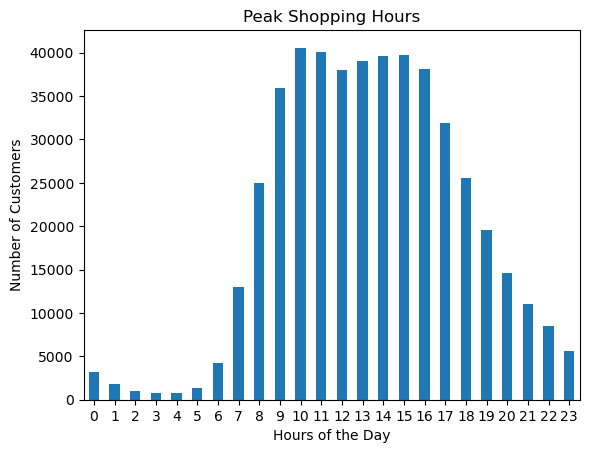

In [36]:
order_hour = df_orders['order_hour_of_day'].value_counts().sort_index()
order_hour.plot(kind='bar',
               title='Peak Shopping Hours',
               x='order_hour_of_day',
               xlabel='Hours of the Day',
               ylabel='Number of Customers',
               rot=0)
plt.show()

You can see from this graph that most shoppers make orders between 9 A.M. and 5 P.M.

### [A3] What day of the week do people shop for groceries?

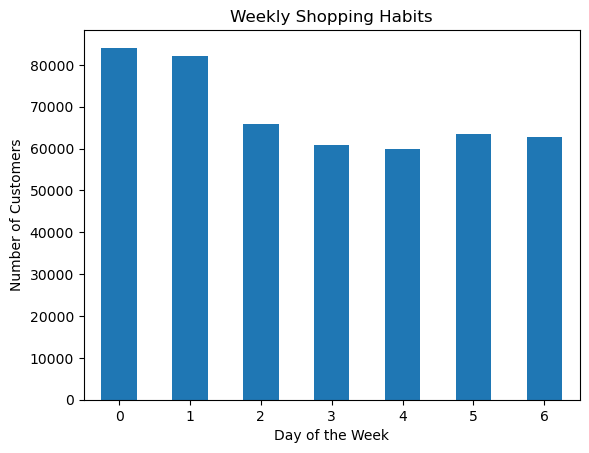

In [37]:
order_day = df_orders['order_dow'].value_counts().sort_index()
order_day.plot(kind='bar',
               title='Weekly Shopping Habits',
               x='order_dow',
               xlabel='Day of the Week',
               ylabel='Number of Customers',
               rot=0)
plt.show()

Using the days I described earlier, most people shop on Sunday followed closely by Monday

### [A4] How long do people wait until placing another order?

In [38]:
display(df_orders['days_since_prior_order'].value_counts().head(5))
df_orders_cleaned = (df_orders[(df_orders['days_since_prior_order'] != 0) & (df_orders['days_since_prior_order'] != 30)])
df_orders_cleaned['days_since_prior_order'].value_counts().head(5)

days_since_prior_order
30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
Name: count, dtype: int64

days_since_prior_order
7.0    44577
6.0    33930
4.0    31006
3.0    30224
5.0    30096
Name: count, dtype: int64

Because 0 and 30 contain all outliers for the data they are removed from analysis

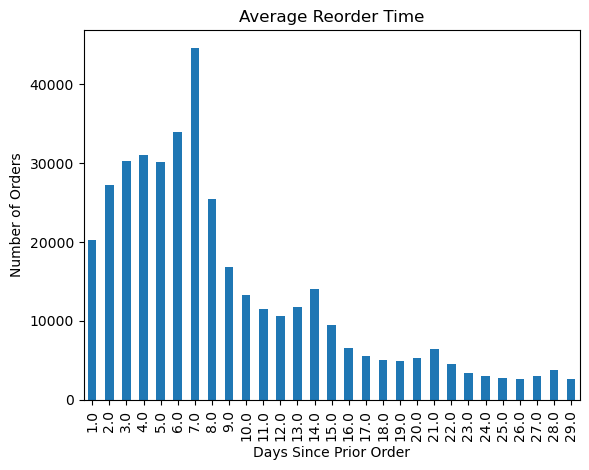

In [39]:
days_since_order = df_orders_cleaned['days_since_prior_order'].value_counts().sort_index()
days_since_order.plot(kind='bar',
                      title='Average Reorder Time',
                      xlabel='Days Since Prior Order',
                      ylabel='Number of Orders')
plt.show()

From this graph we can determine that most users order again within 7 days, with a prominent spike on the 7th day and another spike every 7 days after.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [40]:
wednesday = df_orders[df_orders['order_dow'] == 3]
saturday = df_orders[df_orders['order_dow'] == 6]
display(wednesday.head())
display(saturday.head())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
6,2511640,148233,40,3,8,2.0
16,3109465,55090,19,3,15,9.0
28,133707,182261,1,3,10,NaN
30,1890318,193501,3,3,15,30.0
35,125325,106853,6,3,19,30.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
11,102585,191558,18,6,16,8.0
14,2843219,74699,4,6,11,30.0
20,50934,178510,9,6,9,5.0
26,1844247,122558,4,6,18,30.0


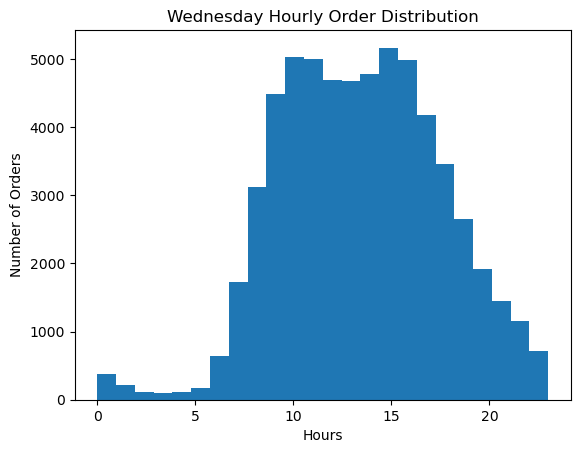

In [41]:
wednesday['order_hour_of_day'].plot(kind='hist',
                                    bins=24,
                                    title='Wednesday Hourly Order Distribution')
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.show()

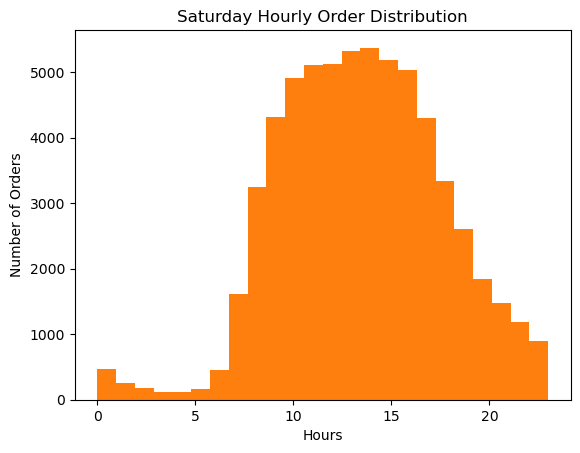

In [42]:
saturday['order_hour_of_day'].plot(kind='hist',
                                   bins=24,
                                   title='Saturday Hourly Order Distribution',
                                   color='tab:orange')
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.show()

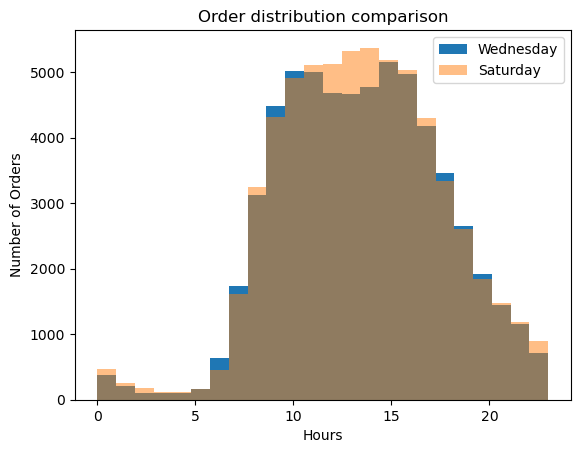

In [43]:
wednesday['order_hour_of_day'].plot(kind='hist',
                                    bins=24,
                                    title='Order distribution comparison')
saturday['order_hour_of_day'].plot(kind='hist',
                                   bins=24,
                                   alpha=.5)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.legend(['Wednesday', 'Saturday'])
plt.show()

The two days have similar shopping habits however saturday has more shoppers from `2 P.M. - 5 P.M.` likely due to weekday shoppers making orders during lunch hours.

### [B2] What's the distribution for the number of orders per customer?

In [44]:
customer_habits = df_orders.groupby('user_id')['order_number'].max()
display(customer_habits.describe())
customer_habits.head()

count    157437.000000
mean         15.577571
std          17.215517
min           1.000000
25%           4.000000
50%           9.000000
75%          20.000000
max         100.000000
Name: order_number, dtype: float64

user_id
2     4
4     6
5     4
6     4
7    19
Name: order_number, dtype: int64

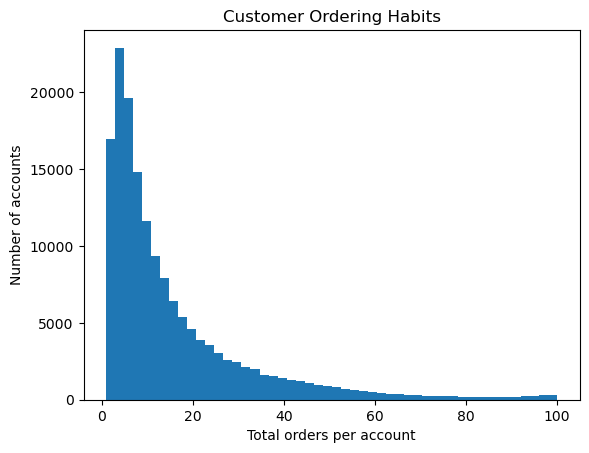

In [45]:
customer_habits.plot(kind='hist',
                     bins=50,
                     title='Customer Ordering Habits')
plt.xlabel('Total orders per account')
plt.ylabel('Number of accounts')
plt.show()

While there are a significant number of users who make a large number of orders, the majority of users have made no more than 10 orders.

The large number of customers with low numbers of orders suggests a lot of new accounts.

### [B3] What are the top 20 popular products (display their id and name)?

In [46]:
top_20 = df_order_products.groupby('product_id')['order_id'].count().sort_values(ascending=False).reset_index().head(20)
display(top_20)
print(sorted(top_20['product_id']))

,product_id,order_id
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
5,47766,24689
6,47626,21495
7,16797,20018
8,26209,19690
9,27845,19600


[5876, 8277, 13176, 16797, 21137, 21903, 22935, 24852, 24964, 26209, 27845, 27966, 28204, 39275, 40706, 45007, 47209, 47626, 47766, 49683]


In [47]:
top_products = df_products[df_products['product_id'].isin(top_20['product_id'])][['product_id', 'product_name']]
top_products = top_products.merge(top_20, on='product_id').sort_values('order_id', ascending=False)
top_products.columns = ['product_id', 'product_name', 'amount_ordered']
top_products

,product_id,product_name,amount_ordered
7,24852,banana,66050
2,13176,bag of organic bananas,53297
4,21137,organic strawberries,37039
5,21903,organic baby spinach,33971
16,47209,organic hass avocado,29773
18,47766,organic avocado,24689
17,47626,large lemon,21495
3,16797,strawberries,20018
9,26209,limes,19690
10,27845,organic whole milk,19600


The top 20 items are all fruits and vegetables with the sole exception of product `27845 - organic whole milk`

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [48]:
items_per_order = df_order_products.groupby('order_id')['add_to_cart_order'].count()
items_per_order = items_per_order[items_per_order != 999]
items_per_order.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: add_to_cart_order, dtype: float64

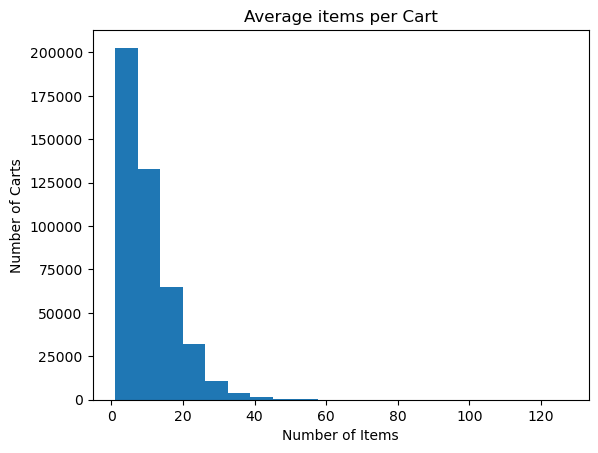

In [49]:
items_per_order.plot(kind='hist',
                     bins=20,
                     title='Average items per Cart')
plt.xlabel('Number of Items')
plt.ylabel('Number of Carts')
plt.show()

I sorted the `order_products` by order and chose the max value for `add_to_cart_order` as that should be the size of the cart since the minimum value is 1.

People tend to have around 8-10 items per order.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [50]:
most_reordered = df_order_products.groupby('product_id')['reordered'].sum().sort_values(ascending=False).head(20)
most_reordered

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: reordered, dtype: int64

In [51]:
re_products = df_products[df_products['product_id'].isin(most_reordered.index)][['product_id', 'product_name']]
re_products = re_products.merge(most_reordered, on='product_id').sort_values('reordered', ascending=False)
re_products

,product_id,product_name,reordered
7,24852,banana,55763
2,13176,bag of organic bananas,44450
4,21137,organic strawberries,28639
5,21903,organic baby spinach,26233
15,47209,organic hass avocado,23629
17,47766,organic avocado,18743
10,27845,organic whole milk,16251
16,47626,large lemon,15044
11,27966,organic raspberries,14748
3,16797,strawberries,13945


In [52]:
top_products.merge(re_products,
                  on='product_id',
                  how='outer',
                  suffixes=['_most_orderered', '_most_reordered'])

,product_id,product_name_most_orderered,amount_ordered,product_name_most_reordered,reordered
0,5876,organic lemon,12232.0,organic lemon,8412.0
1,8277,apple honeycrisp organic,11993.0,apple honeycrisp organic,8836.0
2,13176,bag of organic bananas,53297.0,bag of organic bananas,44450.0
3,16797,strawberries,20018.0,strawberries,13945.0
4,21137,organic strawberries,37039.0,organic strawberries,28639.0
5,21903,organic baby spinach,33971.0,organic baby spinach,26233.0
6,22935,organic yellow onion,15898.0,organic yellow onion,11145.0
7,24852,banana,66050.0,banana,55763.0
8,24964,organic garlic,15292.0,organic garlic,10411.0
9,26209,limes,19690.0,limes,13327.0


From my attempt, the two lists are almost identical, showing that customers very often order fruits and vegetables.

### [C3] For each product, what proportion of its orders are reorders?

In [55]:
df_order_products.merge(df_products).groupby(['product_id', 'product_name'])['reordered'].mean()

product_id  product_name                                                     
1           chocolate sandwich cookies                                           0.564286
2           all-seasons salt                                                     0.000000
3           robust golden unsweetened oolong tea                                 0.738095
4           smart ones classic favorites mini rigatoni with vodka cream sauce    0.510204
7           pure coconut water with orange                                       0.500000
                                                                                   ...   
49690       high performance energy drink                                        0.800000
49691       original pancake & waffle mix                                        0.430556
49692       organic instant oatmeal light maple brown sugar                      0.416667
49693       spring water body wash                                               0.440000
49694       burrito- s

From what we can see from the table it looks like most products have a significant amount of reorders.

### [C4] For each customer, what proportion of their products ordered are reorders?

In [61]:
df_order_products.merge(df_orders).groupby(['order_id', 'user_id'])['reordered'].mean()

order_id  user_id
4         178520     0.923077
9         139016     0.666667
11        143742     1.000000
19        83009      1.000000
20        182912     0.000000
                       ...   
3421034   130508     1.000000
3421053   32775      1.000000
3421071   124485     0.200000
3421077   107102     0.000000
3421079   108687     0.000000
Name: reordered, Length: 450046, dtype: float64

Unlike the products verson of this table, Users seem to not reorder items, with a few exceptions who only order a few of the same products each order.

### [C5] What are the top 20 items that people put in their carts first? 

In [57]:
first_items = df_order_products[df_order_products['add_to_cart_order'] == 1]
first_items = first_items.groupby('product_id')['add_to_cart_order'].count().reset_index().sort_values('add_to_cart_order', ascending=False).head(20)
first_items

,product_id,add_to_cart_order
13414,24852,15562
7127,13176,11026
15028,27845,4363
11384,21137,3946
25439,47209,3390
11786,21903,3336
25732,47766,3044
10622,19660,2336
9050,16797,2308
15102,27966,2024


In [58]:
first_names = df_products[df_products['product_id'].isin(first_items['product_id'])][['product_id', 'product_name']]
first_names

,product_id,product_name
195,196,soda
5784,5785,organic reduced fat 2% milk
12340,12341,hass avocados
13175,13176,bag of organic bananas
16796,16797,strawberries
19659,19660,spring water
21136,21137,organic strawberries
21902,21903,organic baby spinach
24851,24852,banana
26208,26209,limes


In [59]:
first_items = first_items.merge(first_names, on='product_id')
first_items.columns = ['product_id', 'times_added_first', 'product_name']
first_items

,product_id,times_added_first,product_name
0,24852,15562,banana
1,13176,11026,bag of organic bananas
2,27845,4363,organic whole milk
3,21137,3946,organic strawberries
4,47209,3390,organic hass avocado
5,21903,3336,organic baby spinach
6,47766,3044,organic avocado
7,19660,2336,spring water
8,16797,2308,strawberries
9,27966,2024,organic raspberries


Filtered the `order_products` dataframe to only include the first item added to carts then found the 20 items that occur the most. 




Thus concludes the project. We took a large amount of customer data from the application Instacart and have manipulated it in various ways to answer a few questions about what customers are purchasing and when they are making those purchases. We can infer from the data that there is growth happening from the increasing number of orders per customer. Most of those new customers only purchase a few items and the most purchased, repurchased and the first item added to most customer's carts are fruits and vegetables. Most shoppers buy groceries once a week or every 7 days, typically on Sunday or Monday.